##**Introduction to dataset**
Gapminder dataset explains about GDP per capita as a measure of average income per person in a country. this dataset contain information about population ,life expectency ,and gdp percapita from 1952 till 2007 for each country,in this project we are using python to address certain question 

variables used in this datasets is:
- country = country
- country	year= data collected years
- population= population of each country
- continent	= Continent where country is located
- life_exp= life expectency at birth
- gdp_cap= GDP per capita


In [4]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
#reading data files using python read function  
df1= pd.read_excel("/content/Gapminder_key_1.xlsx")
df2= pd.read_excel("/content/Gapminder_key_2.xlsx")

In [6]:
df1.head()  #shows first five rows of dataset df1

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia


In [7]:
df2.head() #shows first five rows of dataset df2

,country,year,life_exp,gdp_cap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106


In [10]:
#merging two data frames on country and year
df3 = pd.merge(df1,df2,how='outer',on=['country','year'])  #using merge funtction to merge both data frames df1 & df2
df3.shape    # checking shape of data frame  


(1704, 6)

In [11]:
df3.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [12]:
df3.tail()  #shows last five rows of dataset df2

,country,year,population,continent,life_exp,gdp_cap
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298


In [ ]:
df3.info()  #info function to see info regarding ,data type , null values ,columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 93.2+ KB


In [ ]:
#converting catagory of country and continent from object  to category
for i in ['country','continent']:     # using for loop to convert data type of variables
  df3[i]=df3[i].astype("category")

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 76.9 KB


In [ ]:
# no of occurence of each country in a data frame 
df3['country'].value_counts()   # show the count of each unique value in a column country 

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

In [ ]:
# no of countrys in dataframe 
df3.country.unique()  # shows all unique values in column 

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', ..., 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']
Length: 142
Categories (142, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza',
                           'Yemen, Rep.', 'Zambia', 'Zimbabwe']

In [16]:
# country had the lowest life expectancy in 2007
df_2007 =df3[ df3['year'] == 2007]   # setting year = 2007 
df_2007[df_2007['life_exp']==df_2007["life_exp"].min()]  # getting min life_exp 

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


In [ ]:
df3.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [19]:
# country had the highest GDP in 2007
df_gdp = df3[df3.year == 2007]   #setting year = 2007
df_gdp['gdp'] = df_gdp['gdp_cap'] * df_gdp['population']   #creating  new column gdp
df_gdp[df_gdp.gdp == df_gdp.gdp.max()]    # getting max gdp in  year 2007


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,year,population,continent,life_exp,gdp_cap,GDP,gdp
1619,United States,2007,301139947,Americas,78.242,42951.65309,1.293446e+13,1.293446e+13


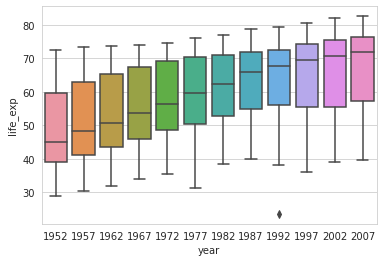

In [25]:
#change in the trend from 1952 to 2007 in life expectancy
sns.set_style("whitegrid")  # shows grid
sns.boxplot(x = 'year', y = 'life_exp', data = df3) # plotting box plot with variable year and lif_exp

from above figure we can see that the life expectency has been increased from 1952 to 2007 

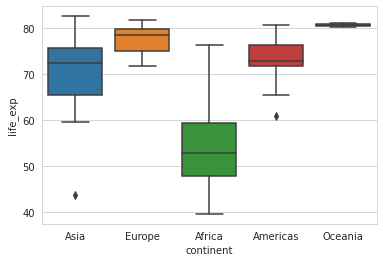

In [26]:
# continent has the lowest life expectancy in 2007?
sns.set_style("whitegrid")
df_2007 = df3[df3['year']==2007]   
sns.boxplot(x='continent', y='life_exp', data=df_2007) # plotting box plot

from the plot it can be clearly seen that Africa has the  lowest life expectency  in year 2007

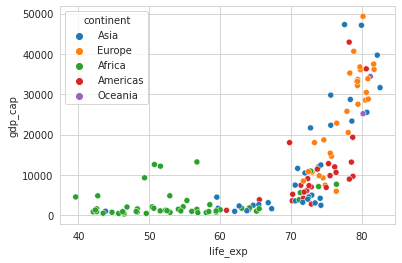

In [ ]:
# relationship between life expectency and gdp per capita? Please show each data point by continent.
df3_2007 = df3[df3['year']==2007] 
sns.scatterplot(x= "life_exp", y= "gdp_cap",hue="continent", data =df3_2007)  # plotting scatter plot

from fig we can see as gdp_cap has increased life expectency has incresed 
except Africa where life expectency  has incresed although gdp_cap is less as compared to other continents 

In [ ]:
# Median age of each continent by year
group_by_years=df3.groupby(["continent","year"])['life_exp'].median()  #using group by function and getting median for lif_exp each year
group_by_years

continent  year
Africa     1952    38.8330
           1957    40.5925
           1962    42.6305
           1967    44.6985
           1972    47.0315
           1977    49.2725
           1982    50.7560
           1987    51.6395
           1992    52.4290
           1997    52.7590
           2002    51.2355
           2007    52.9265
Americas   1952    54.7450
           1957    56.0740
           1962    58.2990
           1967    60.5230
           1972    63.4410
           1977    66.3530
           1982    67.4050
           1987    69.4980
           1992    69.8620
           1997    72.1460
           2002    72.0470
           2007    72.8990
Asia       1952    44.8690
           1957    48.2840
           1962    49.3250
           1967    53.6550
           1972    56.9500
           1977    60.7650
           1982    63.7390
           1987    66.2950
           1992    68.6900
           1997    70.2650
           2002    71.0280
           2007    72.3960
Europe     1